#Task 3

#Install and Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Data Preparation

#Upload and Load the Dataset

In [2]:
# ===  Upload and Load Dataset ===
from google.colab import files
import io

uploaded = files.upload()  # This will prompt for file upload

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
    if fn.lower().endswith('.csv'):
        data = pd.read_csv(io.BytesIO(uploaded[fn]))
        print("CSV file loaded into 'data' variable.")
    elif fn.lower().endswith(('.xls', '.xlsx')):
        data = pd.read_excel(io.BytesIO(uploaded[fn]))
        print("Excel file loaded into 'data' variable.")
    else:
        print("File type not supported for automatic reading.")
        data = None
    if data is not None:
        print(data.head())

Saving bank.csv to bank.csv
User uploaded file "bank.csv" with length 375542 bytes
CSV file loaded into 'data' variable.
   AGE          JOB  MARITAL  EDUCATION DEFAULT  BALANCE HOUSING LOAN  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    CONTACT  DAY MONTH  DURATION  CAMPIGN  P days  PREVIOUS POUTCOME   Y  
0  cellular   19   oct        79        1      -1         0  unknown  no  
1  cellular   11   may       220        1     339         4  failure  no  
2  cellular   16   apr       185        1     330         1  failure  no  
3   unknown    3   jun       199        4      -1         0  unknown  no  
4   unknown    5   may       226        1      -1         0  unkn

#Display First 5 rows

In [3]:
data.head(5)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPIGN,P days,PREVIOUS,POUTCOME,Y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#Display Last 5 rows

In [4]:
data.tail(5)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPIGN,P days,PREVIOUS,POUTCOME,Y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


#Data Overview and Cleaning

In [5]:
#Shape
data.shape

(4521, 17)

In [6]:
#Column names
data.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE', 'HOUSING',
       'LOAN', 'CONTACT', 'DAY', 'MONTH', 'DURATION', 'CAMPIGN', 'P days',
       'PREVIOUS', 'POUTCOME', 'Y'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AGE        4521 non-null   int64 
 1   JOB        4521 non-null   object
 2   MARITAL    4521 non-null   object
 3   EDUCATION  4521 non-null   object
 4   DEFAULT    4521 non-null   object
 5   BALANCE    4521 non-null   int64 
 6   HOUSING    4521 non-null   object
 7   LOAN       4521 non-null   object
 8   CONTACT    4521 non-null   object
 9   DAY        4521 non-null   int64 
 10  MONTH      4521 non-null   object
 11  DURATION   4521 non-null   int64 
 12  CAMPIGN    4521 non-null   int64 
 13  P days     4521 non-null   int64 
 14  PREVIOUS   4521 non-null   int64 
 15  POUTCOME   4521 non-null   object
 16  Y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
#Data types in each cloumns
data.dtypes

,0
AGE,int64
JOB,object
MARITAL,object
EDUCATION,object
DEFAULT,object
BALANCE,int64
HOUSING,object
LOAN,object
CONTACT,object
DAY,int64


In [9]:
#Missing values per column
data.isnull().sum()

,0
AGE,0
JOB,0
MARITAL,0
EDUCATION,0
DEFAULT,0
BALANCE,0
HOUSING,0
LOAN,0
CONTACT,0
DAY,0


#Categorical Values Analysis

In [10]:
# ===  Categorical Columns and Value Counts ===
cat_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())

for col in cat_cols:
    print(f"\nValue counts for '{col}':")
    print(data[col].value_counts())

Categorical columns: ['JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'HOUSING', 'LOAN', 'CONTACT', 'MONTH', 'POUTCOME', 'Y']

Value counts for 'JOB':
JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

Value counts for 'MARITAL':
MARITAL
married     2797
single      1196
divorced     528
Name: count, dtype: int64

Value counts for 'EDUCATION':
EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

Value counts for 'DEFAULT':
DEFAULT
no     4445
yes      76
Name: count, dtype: int64

Value counts for 'HOUSING':
HOUSING
yes    2559
no     1962
Name: count, dtype: int64

Value counts for 'LOAN':
LOAN
no     3830
yes     691
Name: count, dtype: int64

Value counts for 'CONTACT':
CONTACT
cellular     2896
unknown   

#Label Encoding (Optional, if required for heatmap/correlation)

In [11]:
# ===  Label Encoding of Categorical Columns and Value Counts ===
from sklearn.preprocessing import LabelEncoder

# Store original categorical column names
cat_values = data.select_dtypes(include=['object']).columns

# Apply Label Encoding to all columns
data_encoded = data.copy() # Create a copy to avoid modifying the original data directly
for col in data_encoded.columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

print("Value counts for original categorical columns after encoding:")
for col in cat_values:
    print(f"\nValue counts for '{col}':")
    print(data_encoded[col].value_counts())

# Display the first 5 rows after encoding
print("\nFirst 5 rows after encoding:")
print(data_encoded.head())

Value counts for original categorical columns after encoding:

Value counts for 'JOB':
JOB
4     969
1     946
9     768
0     478
7     417
5     230
6     183
2     168
10    128
3     112
8      84
11     38
Name: count, dtype: int64

Value counts for 'MARITAL':
MARITAL
1    2797
2    1196
0     528
Name: count, dtype: int64

Value counts for 'EDUCATION':
EDUCATION
1    2306
2    1350
0     678
3     187
Name: count, dtype: int64

Value counts for 'DEFAULT':
DEFAULT
0    4445
1      76
Name: count, dtype: int64

Value counts for 'HOUSING':
HOUSING
1    2559
0    1962
Name: count, dtype: int64

Value counts for 'LOAN':
LOAN
0    3830
1     691
Name: count, dtype: int64

Value counts for 'CONTACT':
CONTACT
0    2896
2    1324
1     301
Name: count, dtype: int64

Value counts for 'MONTH':
MONTH
8     1398
5      706
1      633
6      531
9      389
0      293
3      222
4      148
10      80
11      52
7       49
2       20
Name: count, dtype: int64

Value counts for 'POUTCOME':
POUTCO

In [12]:
data.head(5)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPIGN,P days,PREVIOUS,POUTCOME,Y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
correlation_data = data_encoded.corr()

print(correlation_data)

                AGE       JOB   MARITAL  EDUCATION   DEFAULT   BALANCE  \
AGE        1.000000 -0.021550 -0.381625  -0.121479 -0.017874  0.094004   
JOB       -0.021550  1.000000  0.069390   0.170160  0.008324  0.011713   
MARITAL   -0.381625  0.069390  1.000000   0.102714 -0.020745  0.028762   
EDUCATION -0.121479  0.170160  0.102714   1.000000 -0.010534  0.073274   
DEFAULT   -0.017874  0.008324 -0.020745  -0.010534  1.000000 -0.133943   
BALANCE    0.094004  0.011713  0.028762   0.073274 -0.133943  1.000000   
HOUSING   -0.193820 -0.128353 -0.029851  -0.087070  0.006881 -0.040282   
LOAN      -0.011178 -0.040245 -0.045210  -0.054086  0.063994 -0.100990   
CONTACT    0.015170 -0.074068 -0.068236  -0.110554  0.008448 -0.014472   
DAY       -0.017985  0.012865  0.008794   0.014926 -0.013261 -0.004523   
MONTH     -0.040886 -0.096613 -0.035855  -0.050086  0.014297  0.017649   
DURATION  -0.006788 -0.007960  0.005323  -0.013823 -0.013535  0.031835   
CAMPIGN   -0.004821 -0.000976  0.00699

#Correlation Heatmap

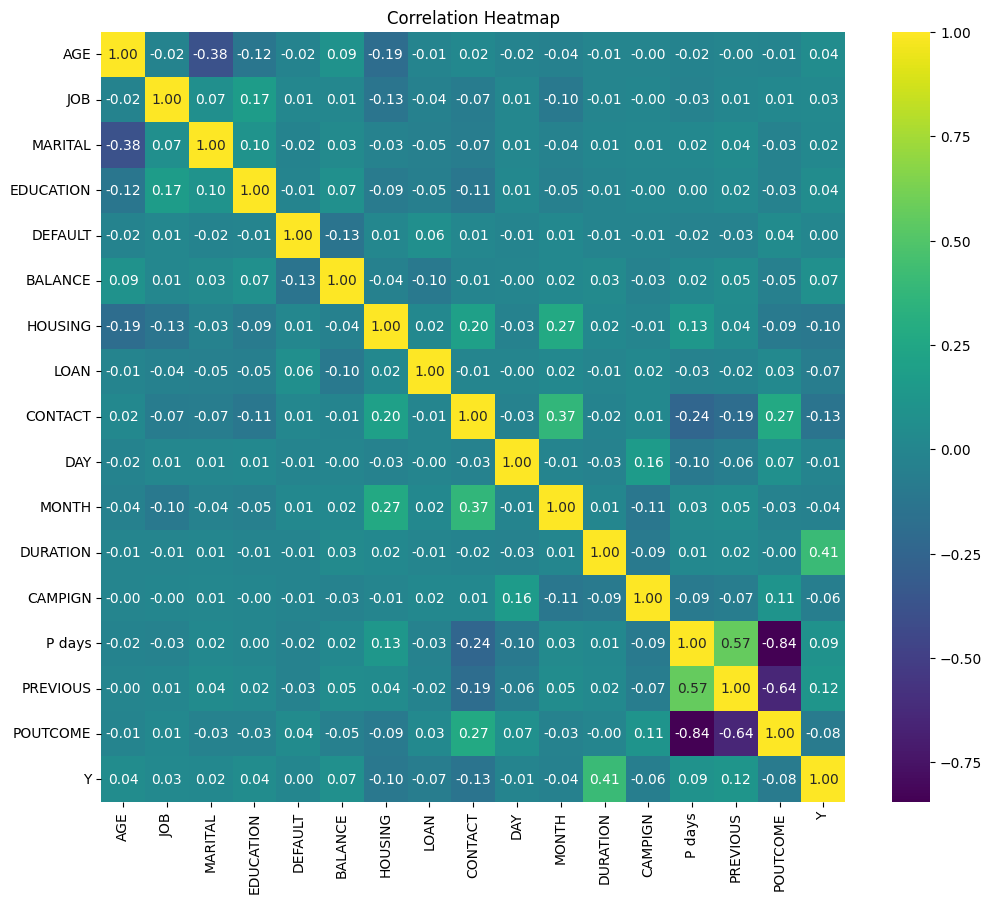

In [14]:
# generate heat map

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Decision Tree Classification

In [16]:
# === Decision Tree Classification & Evaluation ===
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Target column case check
target_name = 'y'
target_cols = [col for col in data.columns if col.strip().lower() == target_name.lower()]
if not target_cols:
    raise KeyError(f"Target column '{target_name}' not found. Available columns: {data.columns.tolist()}")
target_col = target_cols[0]
print("Target column for prediction:", target_col)

# Features/target split
X = data.drop(columns=[target_col])
y = data[target_col]

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions and metrics
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='yes', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, pos_label='yes', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='yes', zero_division=0))

Target column for prediction: Y
Accuracy: 0.8939226519337017
Precision: 0.515625
Recall: 0.336734693877551
F1 Score: 0.4074074074074074


#Visualize Decision Tree

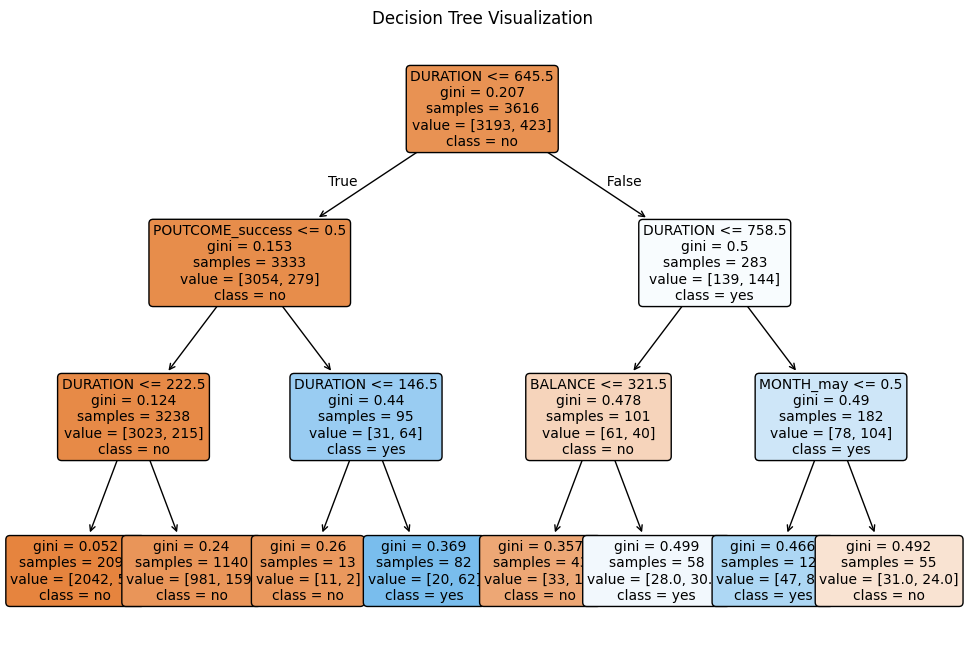

In [17]:
# ===  Visualize Decision Tree ===
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, rounded=True, feature_names=X_encoded.columns, class_names=model.classes_, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()